In [19]:
import numpy as np

from qore import Mine, ASP, QAOA, VQE, Pseudoflow
from qore import ASPSolver, QAOASolver, PseudoflowSolver

from qore.utils import get_bitstring_probabilities

In [20]:
qmine = Mine('mine_config.txt')

# penalty = 20.0
# qmine = Mine(np.array([[-2., 3., 1., -1.], [float('inf'), 5., 3., float('inf')]]))

# penalty = 5.0
# qmine = Mine(np.array([[-2.0, 3.0, -1.0, -2.0, -1.0], [float('inf'), 5.0, 3.0, 10.0, float('inf')], [float('inf'), float('inf'), 4.0, float('inf'), float('inf')]]))

qmine.plot_mine()

+---+--------+-------+-------+
|   |   0    |   1   |   2   |
+---+--------+-------+-------+
| 0 | -2.000 | 3.000 | 1.000 |
| 1 |  inf   | 5.000 |  inf  |
+---+--------+-------+-------+


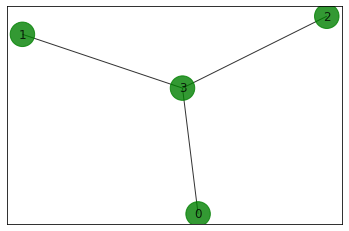

In [21]:
qmine.plot_mine_graph('g')

In [22]:
print(qmine.gen_Hamiltonian(penalty=10.))

-0.0 * IIII
+ 1.0 * IIII
- 1.0 * IIIZ
- 1.5 * IIII
+ 1.5 * IIZI
- 0.5 * IIII
+ 0.5 * IZII
- 2.5 * IIII
+ 2.5 * ZIII
+ 0.0 * IIII
+ 2.5 * IIII
+ 2.5 * IIIZ
- 2.5 * ZIII
- 2.5 * ZIIZ
+ 2.5 * IIII
+ 2.5 * IIZI
- 2.5 * ZIII
- 2.5 * ZIZI
+ 2.5 * IIII
+ 2.5 * IZII
- 2.5 * ZIII
- 2.5 * ZZII


## Pseudoflow

In [23]:
PseudoflowSolver(qmine).solve()

{'opt_config': '1111'}

## ASP

In [24]:
asp = ASPSolver(qmine)

In [25]:
penalty = 10.0
evol_time = 20
nsteps = 40

asp.solve(penalty, evol_time=evol_time, nsteps=nsteps)

{'opt_config': '1111',
 'opt_config_prob': 0.8984375,
 'profit_avg': 6.649905944211197,
 'violation_avg': 0.031190752224617573,
 'ground_state': {'1000': 0.0009765625,
  '1100': 0.00390625,
  '1101': 0.017578125,
  '1111': 0.8984375,
  '1010': 0.00390625,
  '0000': 0.0009765625,
  '0111': 0.005859375,
  '0110': 0.064453125,
  '0100': 0.00390625}}

In [26]:
# add a callback function
def analysis(circ):
    x = get_bitstring_probabilities(circ, asp.quantum_instance)
    bitstr, prob = max(x.items(), key=lambda item: item[1])
    print(f"The most probable configuration and the corresponding probability: {bitstr, prob}")

In [ ]:
asp.solve(penalty, evol_time=evol_time, nsteps=nsteps, callback=analysis, callback_freq=5)

## QAOA

In [ ]:
qaoa = QAOASolver(qmine, p=3)

In [ ]:
penalty = 10.0

qaoa.solve(penalty)